## Definición Matemática del Movimiento Browniano

Un **Movimiento Browniano Estándar** $ W_t $ cumple con las siguientes propiedades:

1. **Condición Inicial**: $ W_0 = 0 $ casi seguramente.
2. **Incrementos Independientes**: Para $ 0 \leq s < t $, $ W_t - W_s $ no depende de valores anteriores.
3. **Distribución Normal**: $ W_t - W_s \sim \mathcal{N}(0, t-s) $.
4. **Trazas Continuas**: Las trayectorias son funciones continuas de $ t $.

En finanzas, se extiende a procesos como el **Movimiento Browniano Geométrico (GBM)** para modelar precios de activos:

$$
dS_t = \mu S_t dt + \sigma S_t dW_t
$$

Donde:
- $ S_t $: Precio del activo en tiempo $ t $.
- $ \mu $: Tasa de rendimiento esperado (drift).
- $ \sigma $: Volatilidad del activo.
- $ W_t $: Movimiento Browniano estándar.

La solución analítica del GBM es:

$$
S_t = S_0 \exp\left( \left(\mu - \frac{\sigma^2}{2} \right)t + \sigma W_t \right)
$$


**Simulación de GBM en Python**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parámetros
S0 = 100       # Precio inicial
mu = 0.08      # Rendimiento esperado (8% anual)
sigma = 0.25   # Volatilidad (25% anual)
T = 1          # Horizonte temporal (1 año)
N = 252        # Número de días hábiles
num_simulations = 10  # Número de trayectorias

In [3]:
# Función para simular GBM
def simulate_gbm(S0, mu, sigma, T, N, num_simulations):
    np.random.seed(42)  # Para reproducibilidad
    dt = T / (N - 1)     # Paso de tiempo
    t = np.linspace(0, T, N)
    S = np.zeros((N, num_simulations))
    S[0] = S0
    for i in range(1, N):
        W = np.random.normal(0, np.sqrt(dt), num_simulations)
        S[i] = S[i-1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * W)

    return t, S

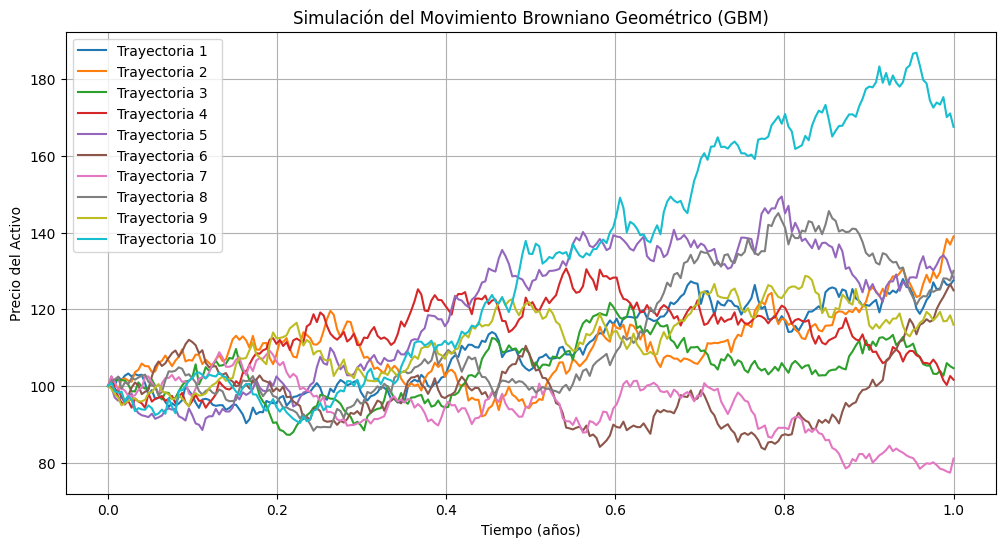

In [4]:
# Simular y graficar
t, S = simulate_gbm(S0, mu, sigma, T, N, num_simulations)
plt.figure(figsize=(12, 6))
for i in range(num_simulations):
    plt.plot(t, S[:, i], label=f'Trayectoria {i+1}')
plt.title("Simulación del Movimiento Browniano Geométrico (GBM)")
plt.xlabel("Tiempo (años)")
plt.ylabel("Precio del Activo")
plt.grid(True)
plt.legend()
plt.show()

Modelar un Movimiento Browniano Geométrico (GBM) con datos reales de Yahoo Finance (`yfinance`)

In [5]:
import yfinance as yf
import matplotlib.pyplot as plt
from aleatory.processes import GBM
import numpy as np
import pandas as pd

Vamos a usar Apple (`AAPL`) como ejemplo.

In [6]:
# Descargar datos
ticker = 'AAPL'
data = yf.download(ticker, start='2023-01-01', end='2024-01-01')

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-01-03 to 2023-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   250 non-null    float64
 1   (High, AAPL)    250 non-null    float64
 2   (Low, AAPL)     250 non-null    float64
 3   (Open, AAPL)    250 non-null    float64
 4   (Volume, AAPL)  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


In [8]:
# Tomamos el precio ajustado de cierre
price_series = data['Close']

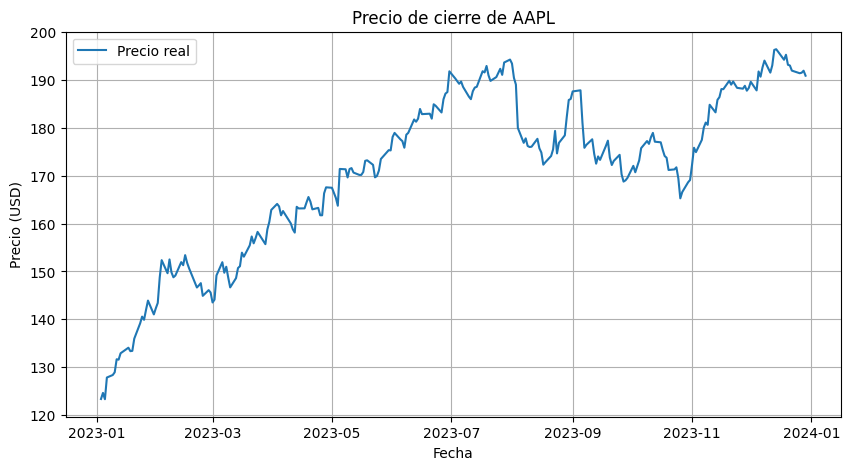

In [9]:
# Graficar el precio real
plt.figure(figsize=(10, 5))
plt.plot(price_series.index, price_series.values, label='Precio real')
plt.title(f'Precio de cierre de {ticker}')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Rendimientos logarítmicos
log_returns = np.log(price_series / price_series.shift(1)).dropna()

In [11]:
# Parámetros del GBM
T = len(log_returns)/ 252  # Número de años (aproximadamente)
N = len(log_returns)     # Número de días
S0 = price_series.iloc[0].item()   # Precio inicial
mu = log_returns.mean().item()* 252      # Drift anualizado
sigma = log_returns.std().item()* np.sqrt(252)  # Volatilidad anualizada

print(f"Número de días: {N}")
print(f"Precio inicial: {S0:.4f}")
print(f"Drift (μ): {mu:.4f}")
print(f"Volatilidad (σ): {sigma:.4f}")

Número de días: 249
Precio inicial: 123.3306
Drift (μ): 0.4422
Volatilidad (σ): 0.1992


In [12]:
## Crear objeto GBM

gbm = GBM(drift=mu, volatility=sigma, initial=S0, T=T)

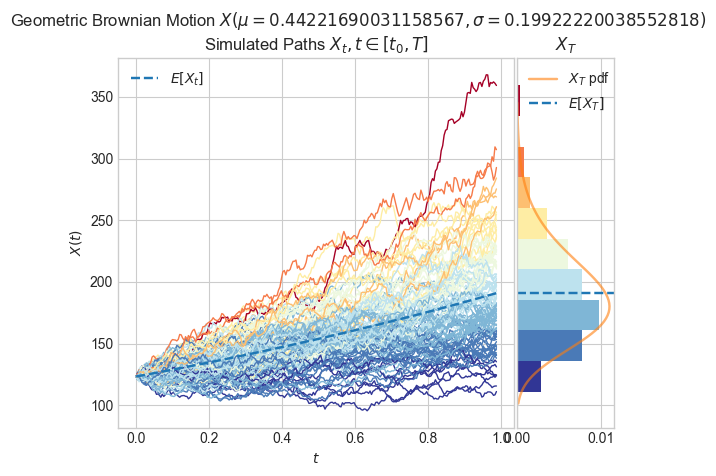

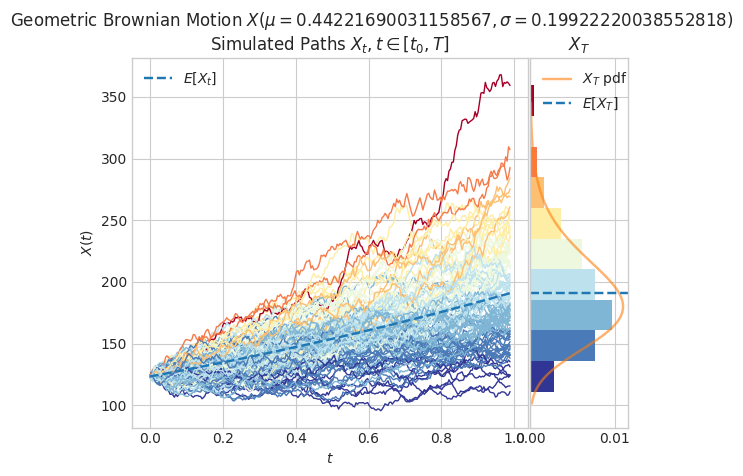

In [13]:
# Simular y graficar
# Aquí N representa el numero de trayectorias

gbm.draw(n=249, N=100)

In [14]:
# Obtener la trayectoria simulada
simulated_path = gbm.sample(250)

In [15]:
# Preparar fechas para la gráfica
dates = price_series.index

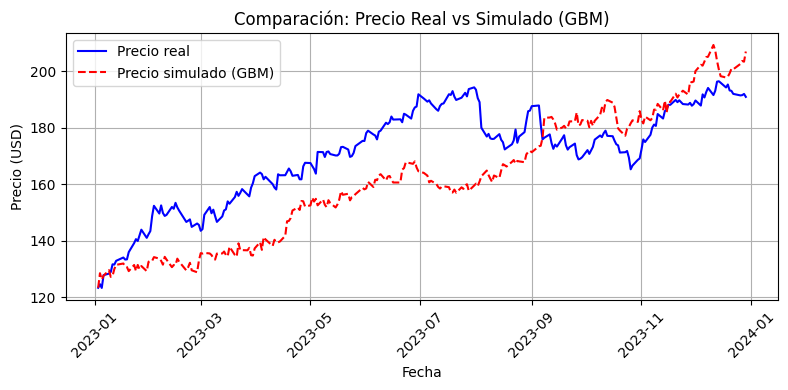

In [16]:
# Graficar comparativa
plt.figure(figsize=(8, 4))
plt.plot(dates, price_series.values, label='Precio real', color='blue')
plt.plot(dates, simulated_path, label='Precio simulado (GBM)', linestyle='--', color='red')
plt.title('Comparación: Precio Real vs Simulado (GBM)')
plt.xlabel('Fecha')
plt.ylabel('Precio (USD)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

En Resumen Hemos:

- Descargado datos reales de `AAPL` usando `yfinance`  
- Calculado rendimientos logarítmicos  
- Estimado los parámetros `mu` (drift) y `sigma` (volatilidad)  
- Usado `aleatory` para simular un **Movimiento Browniano Geométrico (GBM)**  
- Graficado y comparado el comportamiento real contra la simulación teórica

## El Modelo de Heston

El **modelo de Heston** extiende el GBM al permitir que la volatilidad sea estocástica, es decir, sigue su propio proceso aleatorio. Esto permite capturar fenómenos como el **volatility clustering** y el **efecto de sonrisa de volatilidad** observado en los mercados.

### Ecuaciones del Modelo de Heston

$$
\begin{aligned}
dS_t &= \mu S_t dt + \sqrt{v_t} S_t dW_t^1 \\
dv_t &= \kappa(\theta - v_t)dt + \xi \sqrt{v_t} dW_t^2 \\
\text{donde } \mathbb{E}[dW_t^1 dW_t^2] &= \rho dt
\end{aligned}
$$

- $ S_t $: Precio del activo.
- $ v_t $: Varianza estocástica.
- $ \kappa $: Velocidad de reversión a la media.
- $ \theta $: Nivel de varianza a largo plazo.
- $ \xi $: Volatilidad de la varianza (vol-of-vol).
- $ \rho $: Correlación entre los movimientos brownianos.

### Implementación en Python

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Parámetros del modelo
S0 = 100       # Precio inicial
v0 = 0.04      # Varianza inicial
mu = 0.05      # Drift
kappa = 2.0    # Velocidad de reversión
theta = 0.04   # Nivel de varianza a largo plazo
xi = 0.3       # Volatilidad de la varianza
rho = -0.7     # Correlación entre activo y varianza
T = 1          # Horizonte temporal
N = 252        # Días hábiles
dt = T / N     # Paso de tiempo
num_simulations = 10  # Número de trayectorias

In [19]:
# Función para simular Heston
def heston_model(S0, v0, mu, kappa, theta, xi, rho, T, N, num_simulations):
    np.random.seed(42)
    t = np.linspace(0, T, N)
    S = np.zeros((N, num_simulations))
    v = np.zeros((N, num_simulations))
    S[0] = S0
    v[0] = v0

    # Matriz de correlación
    cov = np.array([[1, rho], [rho, 1]])
    L = np.linalg.cholesky(cov)  # Descomposición de Cholesky

    for i in range(1, N):
        # Generar dos normales correlacionadas
        Z = np.random.multivariate_normal(mean=[0, 0], cov=cov, size=num_simulations)
        Z1, Z2 = Z[:, 0], Z[:, 1]

        # Discretización de Euler para varianza (con truncamiento para evitar valores negativos)
        dv = kappa * (theta - v[i-1]) * dt + xi * np.sqrt(v[i-1] * dt) * Z2
        v[i] = np.maximum(v[i-1] + dv, 0)  # Evitar varianza negativa

        # Precio del activo
        S[i] = S[i-1] * np.exp((mu - 0.5 * v[i-1]) * dt + np.sqrt(v[i-1] * dt) * Z1)

    return t, S, v

In [20]:
# Simular y graficar
t, S, v = heston_model(S0, v0, mu, kappa, theta, xi, rho, T, N, num_simulations)

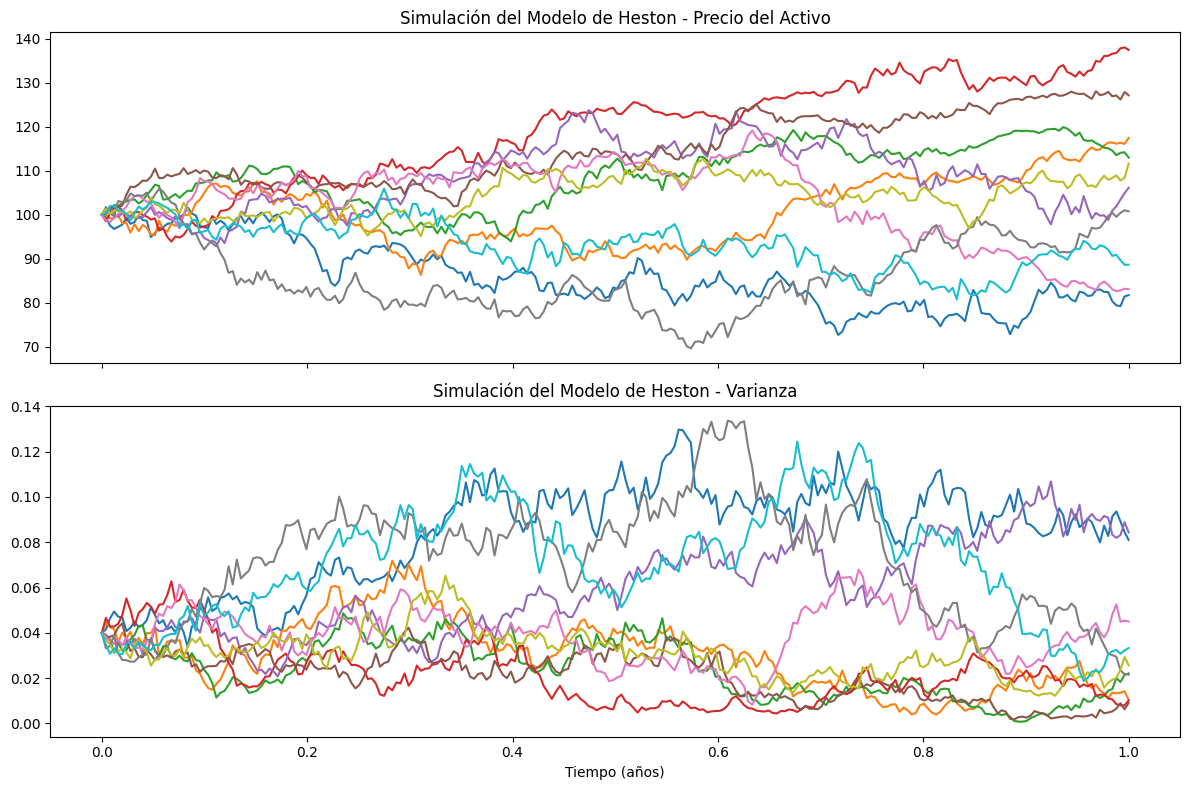

In [21]:
# Gráfica de precios y varianza
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
for i in range(num_simulations):
    axes[0].plot(t, S[:, i], label=f'Trayectoria {i+1}')
    axes[1].plot(t, v[:, i], label=f'Trayectoria {i+1}')
axes[0].set_title("Simulación del Modelo de Heston - Precio del Activo")
axes[1].set_title("Simulación del Modelo de Heston - Varianza")
plt.xlabel("Tiempo (años)")
plt.tight_layout()
plt.show()

## Optimización de Carteras con Simulaciones de GBM

La **optimización de carteras** busca maximizar el rendimiento ajustado al riesgo. Usando simulaciones de GBM, podemos modelar activos correlacionados y encontrar la combinación óptima de pesos.

### Estrategia: Frontera Eficiente con Monte Carlo

1. Simular múltiples activos con correlaciones.
2. Generar combinaciones aleatorias de pesos.
3. Calcular rendimiento y riesgo (volatilidad).
4. Identificar la cartera con la máxima **ratio de Sharpe** (rendimiento/riesgo).

### Código de Optimización de Carteras

In [22]:
# Parámetros de múltiples activos
num_assets = 4
returns = np.array([0.08, 0.12, 0.10, 0.06])  # Rendimientos esperados
volatilities = np.array([0.15, 0.20, 0.18, 0.10])  # Volatilidades
corr_matrix = np.array([
    [1.0, 0.3, 0.2, 0.1],
    [0.3, 1.0, 0.4, 0.2],
    [0.2, 0.4, 1.0, 0.3],
    [0.1, 0.2, 0.3, 1.0]
])

In [23]:
# Simular precios de múltiples activos con GBM
def simulate_multivariate_gbm(returns, vols, corr, S0, T, N, num_simulations):
    cov = np.outer(vols, vols) * corr
    chol = np.linalg.cholesky(cov)
    dt = T / N
    t = np.linspace(0, T, N)
    paths = np.zeros((N, num_simulations, num_assets))
    paths[0] = S0
    for i in range(1, N):
        Z = np.random.normal(0, 1, (num_simulations, num_assets))
        W = np.dot(Z, chol.T)
        paths[i] = paths[i-1] * np.exp((returns - 0.5 * vols**2) * dt + np.sqrt(dt) * W)
    return paths

In [24]:
# Simular carteras
S0 = [100, 100, 100, 100]
paths = simulate_multivariate_gbm(returns, volatilities, corr_matrix, S0, T=1, N=252, num_simulations=10000)

In [25]:
# Calcular rendimientos de carteras aleatorias
num_portfolios = 10000
weights = np.random.dirichlet(np.ones(num_assets), num_portfolios)
port_returns = np.sum(returns * weights, axis=1)
port_volatilities = np.sqrt(np.einsum('ij,ik,jk->i', weights, weights, corr_matrix))

In [26]:
# Calcular ratio de Sharpe
risk_free_rate = 0.02
sharpe_ratios = (port_returns - risk_free_rate) / port_volatilities

In [27]:
# Encontrar la mejor cartera
max_sharpe_idx = np.argmax(sharpe_ratios)
optimal_weights = weights[max_sharpe_idx]

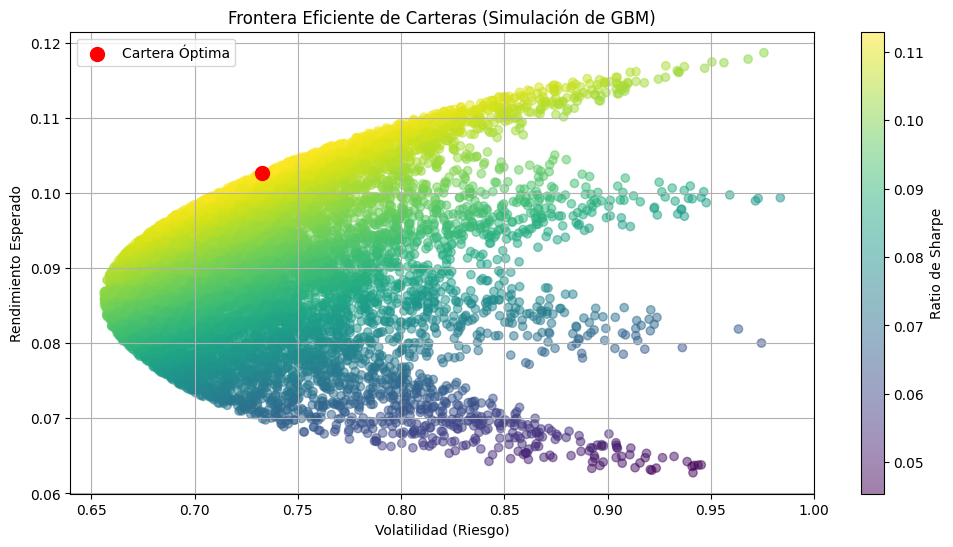

In [28]:
# Graficar la frontera eficiente
plt.figure(figsize=(12, 6))
plt.scatter(port_volatilities, port_returns, c=sharpe_ratios, cmap='viridis', alpha=0.5)
plt.colorbar(label='Ratio de Sharpe')
plt.scatter(port_volatilities[max_sharpe_idx], port_returns[max_sharpe_idx], marker='o', color='r', s=100, label='Cartera Óptima')
plt.title("Frontera Eficiente de Carteras (Simulación de GBM)")
plt.xlabel("Volatilidad (Riesgo)")
plt.ylabel("Rendimiento Esperado")
plt.legend()
plt.grid(True)
plt.show()

In [29]:
# Mostrar pesos óptimos
print("Pesos óptimos:", optimal_weights)

Pesos óptimos: [0.19240767 0.46585612 0.27281382 0.06892239]
